<a href="https://colab.research.google.com/github/cjmcneil/audio-restorer/blob/main/SpectralSubtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Special thanks to Shun60s (https://github.com/shun60s/spectral-subtraction/blob/master/ss1.py)

1. Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import scipy
import librosa

import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display 

from glob import glob

import IPython.display as ipd

In [3]:
training_files = glob('/content/drive/MyDrive/Static_Wav_Dataset/*.wav')
testing_files = glob('/content/drive/MyDrive/Static_Wav_Test_Dataset/*.wav')

2. Define wav files

In [4]:
infile = testing_files[2] # "Listening to the dogs howling way off across the valley..."
outfile = 'dog_valley.wav'
noisefile = '/content/drive/MyDrive/scraped_static.wav'

In [5]:
sample_rate = 5512
audio_sound, sr = librosa.load(infile, sr = sample_rate)

In [6]:
ipd.Audio(infile, rate=sr)

In [7]:
print(type(infile))

<class 'str'>


In [8]:
print(type(noisefile))

<class 'str'>


In [9]:
sample_rate = 5512
audio_sound, sr = librosa.load(noisefile, sr = sample_rate)

In [10]:
ipd.Audio(noisefile)

<ipython-input-11-e949d565e562>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_sound, sr=sr, ax=ax, x_axis='time')


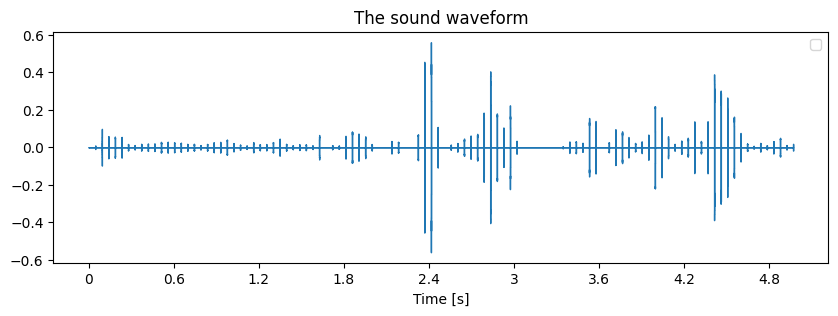

In [11]:
#Plotting the infile's signal waveform
fig, ax = plt.subplots(figsize=(10,3))
librosa.display.waveshow(audio_sound, sr=sr, ax=ax, x_axis='time')
ax.set (title='The sound waveform', xlabel='Time [s]')
ax.legend()

3. Load input file and stft (Short-time Fourier Transform)

In [12]:
print('Load testing file...', infile)
w, sr = librosa.load(infile, sr=None, mono=True) #keep native sampling rate and trans into mono
s = librosa.stft(w)                              #stft
ss = np.abs(s)                                   #get magnitude
angle = np.angle(s)                              #get phase 
b = np.exp(1.0j* angle)                          #use this phase information when Inverse Transform

Load testing file... /content/drive/MyDrive/Static_Wav_Test_Dataset/Quiet_Please_Dogs_Howling_Across_The_Valley.wav


4. Load noise only file, stft, and get mean

In [13]:
print('Load noise file...', noisefile)
nw, nsr = librosa.load(noisefile, sr=None, mono=True)
ns = librosa.stft(nw)
nss = np.abs(ns)
mns = np.mean(nss, axis=1) #get mean

Load noise file... /content/drive/MyDrive/scraped_static.wav


5. Subtract noise spectral mean from input spectral, and isfit (Inverse Short-Time Fourier Transform)

In [14]:
sa = ss - mns.reshape((mns.shape[0],1)) #reshape for broadcast to subtract
sa0 = sa * b                            # apply phase information
y = librosa.istft(sa0)                  #back to time domain signal

6. Save as a wav file

In [15]:
scipy.io.wavfile.write(outfile, sr, (y * 32768).astype(np.int16))  #save signed 16-bit WAV format
print('Write wav', outfile)

Write wav dog_valley.wav


In [16]:
ipd.Audio(outfile)